___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
import plotly
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "colab"
#To display the plots
%matplotlib inline
from ipywidgets import interact

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score,\
                            precision_score, make_scorer,\
                            classification_report,confusion_matrix,\
                            ConfusionMatrixDisplay, average_precision_score,\
                            roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

from sklearn.pipeline import Pipeline
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [ ]:
female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding_errors="ignore")

In [ ]:
male = pd.read_csv("ANSUR II MALE Public.csv", encoding='latin-1')

In [ ]:
female.drop(axis = 1, columns="SubjectId", inplace=True)

In [ ]:
male.drop(axis = 1, columns="subjectid", inplace=True)


In [ ]:
df = pd.concat([male, female])

## Explore Data

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Data columns (total 107 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    abdominalextensiondepthsitting  int64 
 1    acromialheight                  int64 
 2    acromionradialelength           int64 
 3    anklecircumference              int64 
 4    axillaheight                    int64 
 5    balloffootcircumference         int64 
 6    balloffootlength                int64 
 7    biacromialbreadth               int64 
 8    bicepscircumferenceflexed       int64 
 9    bicristalbreadth                int64 
 10   bideltoidbreadth                int64 
 11   bimalleolarbreadth              int64 
 12   bitragionchinarc                int64 
 13   bitragionsubmandibulararc       int64 
 14   bizygomaticbreadth              int64 
 15   buttockcircumference            int64 
 16   buttockdepth                    int64 
 17   buttockheight                  

In [ ]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

def check_obj_columns(df):
    '''
    Returns NO PROBLEM or column/s which has/have mixed object types.
    '''

    tdf = df.select_dtypes(include=['object']).applymap(type)
    for col in tdf:
        if len(set(tdf[col].values)) > 1:
            print("Column" + " " + color.BOLD + color.RED + col + color.END + " " + "has mixed object types." )
    else:
        if len(set(tdf[col].values)) == 1:
            print(color.BOLD + color.GREEN + "NO PROBLEM" + " " + color.END + " " + "with the data types of Columns in the DataFrame.")

check_obj_columns(df)

Column Ethnicity has mixed object types.
NO PROBLEM  with the data types of Columns in the DataFrame.


In [ ]:
df.isnull().sum()*100 / df.shape[0]

abdominalextensiondepthsitting     0.00000
acromialheight                     0.00000
acromionradialelength              0.00000
anklecircumference                 0.00000
axillaheight                       0.00000
balloffootcircumference            0.00000
balloffootlength                   0.00000
biacromialbreadth                  0.00000
bicepscircumferenceflexed          0.00000
bicristalbreadth                   0.00000
bideltoidbreadth                   0.00000
bimalleolarbreadth                 0.00000
bitragionchinarc                   0.00000
bitragionsubmandibulararc          0.00000
bizygomaticbreadth                 0.00000
buttockcircumference               0.00000
buttockdepth                       0.00000
buttockheight                      0.00000
buttockkneelength                  0.00000
buttockpopliteallength             0.00000
calfcircumference                  0.00000
cervicaleheight                    0.00000
chestbreadth                       0.00000
chestcircum

In [ ]:
# Since Ethnicity Column contains %78 Null values, it has been decided to drop

In [ ]:
df.drop(columns= "Ethnicity", axis=1, inplace=True)

In [ ]:
df.shape

(6068, 106)

In [ ]:
df.duplicated().sum() #No duplicates

0

In [ ]:
df.isnull().sum().any() #No missing values

False

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0
bicristalbreadth,6068.0,274.735003,19.221034,197.0,262.00,274.0,288.00,362.0


1    0.624918
2    0.213909
3    0.111898
4    0.030982
6    0.009723
5    0.008075
8    0.000494
Name: DODRace, dtype: float64


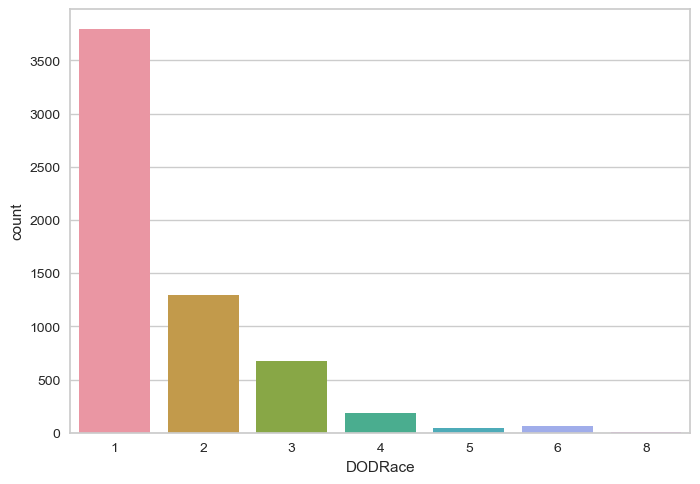

In [ ]:
print(df["DODRace"].value_counts(normalize=True)) # to show the proportion of each class
sns.countplot(data = df, x = "DODRace");

In [ ]:
df["DODRace"].value_counts(normalize=True)

1    0.624918
2    0.213909
3    0.111898
4    0.030982
6    0.009723
5    0.008075
8    0.000494
Name: DODRace, dtype: float64

In [ ]:
# DODRace 1(White),2 (Black), 3 (Hispanic) will be considered since other frequence of classes represents less than %5 of the dataset
df[df["DODRace"]<=3].shape

(5769, 106)

In [ ]:
df[df["DODRace"]>3].shape

(299, 106)

In [ ]:
df = df[df["DODRace"]<=3]

In [ ]:
#pip install dataprep

In [ ]:
#from dataprep.datasets import load_dataset
#from dataprep.eda import create_report
#create_report(df).show_browser()

In [ ]:
df.corr()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
abdominalextensiondepthsitting,1.000000,0.351934,0.312919,0.518896,0.280824,0.456729,0.332593,0.417617,0.691126,0.505856,0.724344,0.366155,0.530905,0.626294,0.519677,0.739481,0.840828,0.245897,0.476406,0.323680,0.658512,0.337354,0.627868,0.825830,0.778442,0.296234,0.189045,0.463251,0.199866,0.242192,0.403525,0.139829,0.264128,0.279748,0.439103,0.345232,0.345895,0.628312,0.728934,0.306099,0.415260,0.419302,0.457253,0.301289,0.361741,0.363256,0.329280,0.502539,0.437203,0.595173,0.554712,0.256398,0.258762,0.599371,0.542195,0.275256,0.348528,0.220816,0.348377,0.674410,0.294322,0.656883,0.627212,0.321105,0.310547,0.149468,0.280206,0.637863,0.287179,0.187664,0.274283,0.422614,0.276912,0.318242,0.307952,0.352710,0.293471,0.730017,0.724702,0.389444,0.260747,0.186359,0.230967,0.728538,0.572029,0.858962,0.939645,0.958716,0.579494,0.147130,0.825198,0.546947,0.383157,0.021654,-0.031860,0.385555,0.289860,0.792196
acromialheight,0.351934,1.000000,0.868267,0.504673,0.987115,0.693952,0.797793,0.733288,0.522740,0.401588,0.628490,0.705043,0.570168,0.583928,0.506695,0.283092,0.341796,0.866969,0.811402,0.746730,0.409358,0.983955,0.542611,0.530689,0.280813,0.959300,0.898981,0.341983,0.410726,0.358753,0.439740,0.278063,0.292532,0.813617,0.671984,0.826817,0.846525,0.635454,0.572406,0.862543,0.893985,0.708512,0.717048,0.752909,0.406551,0.431756,0.548384,0.797380,0.447876,0.207831,0.100192,0.932232,0.337712,0.526440,0.591983,0.895907,0.931762,0.856497,0.677825,0.327282,0.539904,0.627926,0.651816,0.867356,0.709205,0.893400,0.821761,0.689824,0.889043,0.542223,0.821495,0.872367,0.879767,0.883966,0.979925,0.984711,0.945019,0.277236,0.445248,0.803680,0.890896,0.327485,0.883719,0.733662,0.727869,0.438562,0.405161,0.362314,0.607020,0.930954,0.677768,0.733564,0.921268,-0.002552,-0.217393,0.082966,0.943890,0.696038
acromionradialelength,0.312919,0.868267,1.000000,0.416051,0.857391,0.604208,0.725966,0.667377,0.452499,0.343457,0.559916,0.614830,0.519596,0.514486,0.456070,0.247027,0.292016,0.814136,0.775389,0.735224,0.354909,0.865821,0.466411,0.470349,0.265916,0.841836,0.850474,0.247204,0.306636,0.311002,0.370492,0.233762,-0.004899,0.639168,0.587407,0.748856,0.818087,0.556905,0.500992,0.836295,0.820203,0.623868,0.632046,0.719796,0.354258,0.389691,0.483084,0.709314,0.438903,0.182305,0.084485,0.8

In [ ]:
# to find how many unique values object features have
for col in df.select_dtypes("object"):
    print(f"{col} has {df[col].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 281 unique value
SubjectsBirthLocation has 136 unique value
WritingPreference has 3 unique value


In [ ]:
columns = list(df.columns)

In [ ]:
df.select_dtypes(include ="number")

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1,1,41,71,180
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1,1,35,68,160
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,2,2,42,68,205
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1,1,31,66,175
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,2,2,21,77,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.0,247.254290,37.457748,155.0,220.0,243.0,272.0,451.0
acromialheight,5769.0,1408.630265,78.303123,1146.0,1353.0,1412.0,1464.0,1683.0
acromionradialelength,5769.0,328.071590,20.444554,249.0,314.0,328.0,342.0,393.0
anklecircumference,5769.0,225.201768,15.965783,156.0,214.0,225.0,235.0,293.0
axillaheight,5769.0,1301.902583,71.260913,1062.0,1252.0,1304.0,1351.0,1553.0
balloffootcircumference,5769.0,244.408043,16.803556,186.0,233.0,245.0,256.0,306.0
balloffootlength,5769.0,195.118911,13.379000,151.0,186.0,196.0,205.0,245.0
biacromialbreadth,5769.0,399.706015,30.124094,283.0,377.0,404.0,422.0,489.0
bicepscircumferenceflexed,5769.0,341.663027,41.270615,216.0,312.0,342.0,370.0,490.0
bicristalbreadth,5769.0,274.903449,19.239580,197.0,262.0,274.0,288.0,362.0


In [ ]:
df.describe(include=object)

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,WritingPreference
count,5769,5769,5769,5769,5769,5769,5769,5769
unique,2,253,12,3,3,281,136,3
top,Male,5-Apr-12,Camp Shelby,Regular Army,Combat Service Support,11B,California,Right hand
freq,3899,43,1111,2955,3021,641,417,5088


In [ ]:
df.SubjectsBirthLocation.value_counts()

California                417
New York                  411
Texas                     386
Indiana                   264
Florida                   210
Illinois                  210
Oklahoma                  205
Minnesota                 194
Michigan                  194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
New Jersey                 88
Puerto Rico                88
Missouri                   83
Colorado                   78
Maryland                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota               53
Arkansas  

In [ ]:
df["DODRace"] = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",

})

In [ ]:
df.groupby(["Component"])["DODRace"].value_counts(normalize=True)

Component            DODRace 
Army National Guard  White       0.711546
                     Black       0.191408
                     Hispanic    0.097046
Army Reserve         White       0.550725
                     Black       0.251208
                     Hispanic    0.198068
Regular Army         White       0.616920
                     Black       0.252792
                     Hispanic    0.130288
Name: DODRace, dtype: float64

In [ ]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

# Eventhough there are no branch or component where Hispanics are common, in some com`pnent pr branches higher compared to other class.

Component            Branch                  DODRace 
Army National Guard  Combat Arms             White       0.802835
                                             Black       0.101804
                                             Hispanic    0.095361
                     Combat Service Support  White       0.668855
                                             Black       0.227571
                                             Hispanic    0.103574
                     Combat Support          White       0.684783
                                             Black       0.234783
                                             Hispanic    0.080435
Army Reserve         Combat Arms             White       0.833333
                                             Hispanic    0.166667
                     Combat Service Support  White       0.602941
                                             Hispanic    0.220588
                                             Black       0.176471
                     C

In [ ]:
df.SubjectNumericRace.value_counts()

# Since SubjectNumericRace leads to data leakage, it has been decided to remove from the data

1        3559
2        1025
3         541
31        159
8         106
51        102
21         60
23         34
28         26
251        20
41         19
18         16
61         15
25         13
38          9
351         9
231         6
42          6
62          6
35          5
235         4
43          3
63          3
218         3
431         2
2351        2
423         2
2518        2
4251        1
238         1
318         1
451         1
4           1
425         1
428         1
651         1
6           1
631         1
358         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [ ]:
drop_list2 = [
    "Date",
    "Weightlbs", "Heightin", "SubjectNumericRace", "PrimaryMOS"
]

df.drop(columns= drop_list2, inplace=True)

# Primary MOS has also been removed since nor relationship has been occured with the label
# "Weightlbs", "Heightin" features are based on Soldier's declaraction
# subjectid is the id number of the Soldiers, hence it has been dropped at the top.

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [ ]:
df.reset_index(drop=True, inplace=True)


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 101 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    abdominalextensiondepthsitting  int64 
 1    acromialheight                  int64 
 2    acromionradialelength           int64 
 3    anklecircumference              int64 
 4    axillaheight                    int64 
 5    balloffootcircumference         int64 
 6    balloffootlength                int64 
 7    biacromialbreadth               int64 
 8    bicepscircumferenceflexed       int64 
 9    bicristalbreadth                int64 
 10   bideltoidbreadth                int64 
 11   bimalleolarbreadth              int64 
 12   bitragionchinarc                int64 
 13   bitragionsubmandibulararc       int64 
 14   bizygomaticbreadth              int64 
 15   buttockcircumference            int64 
 16   buttockdepth                    int64 
 17   buttockheight                  

<Axes: >

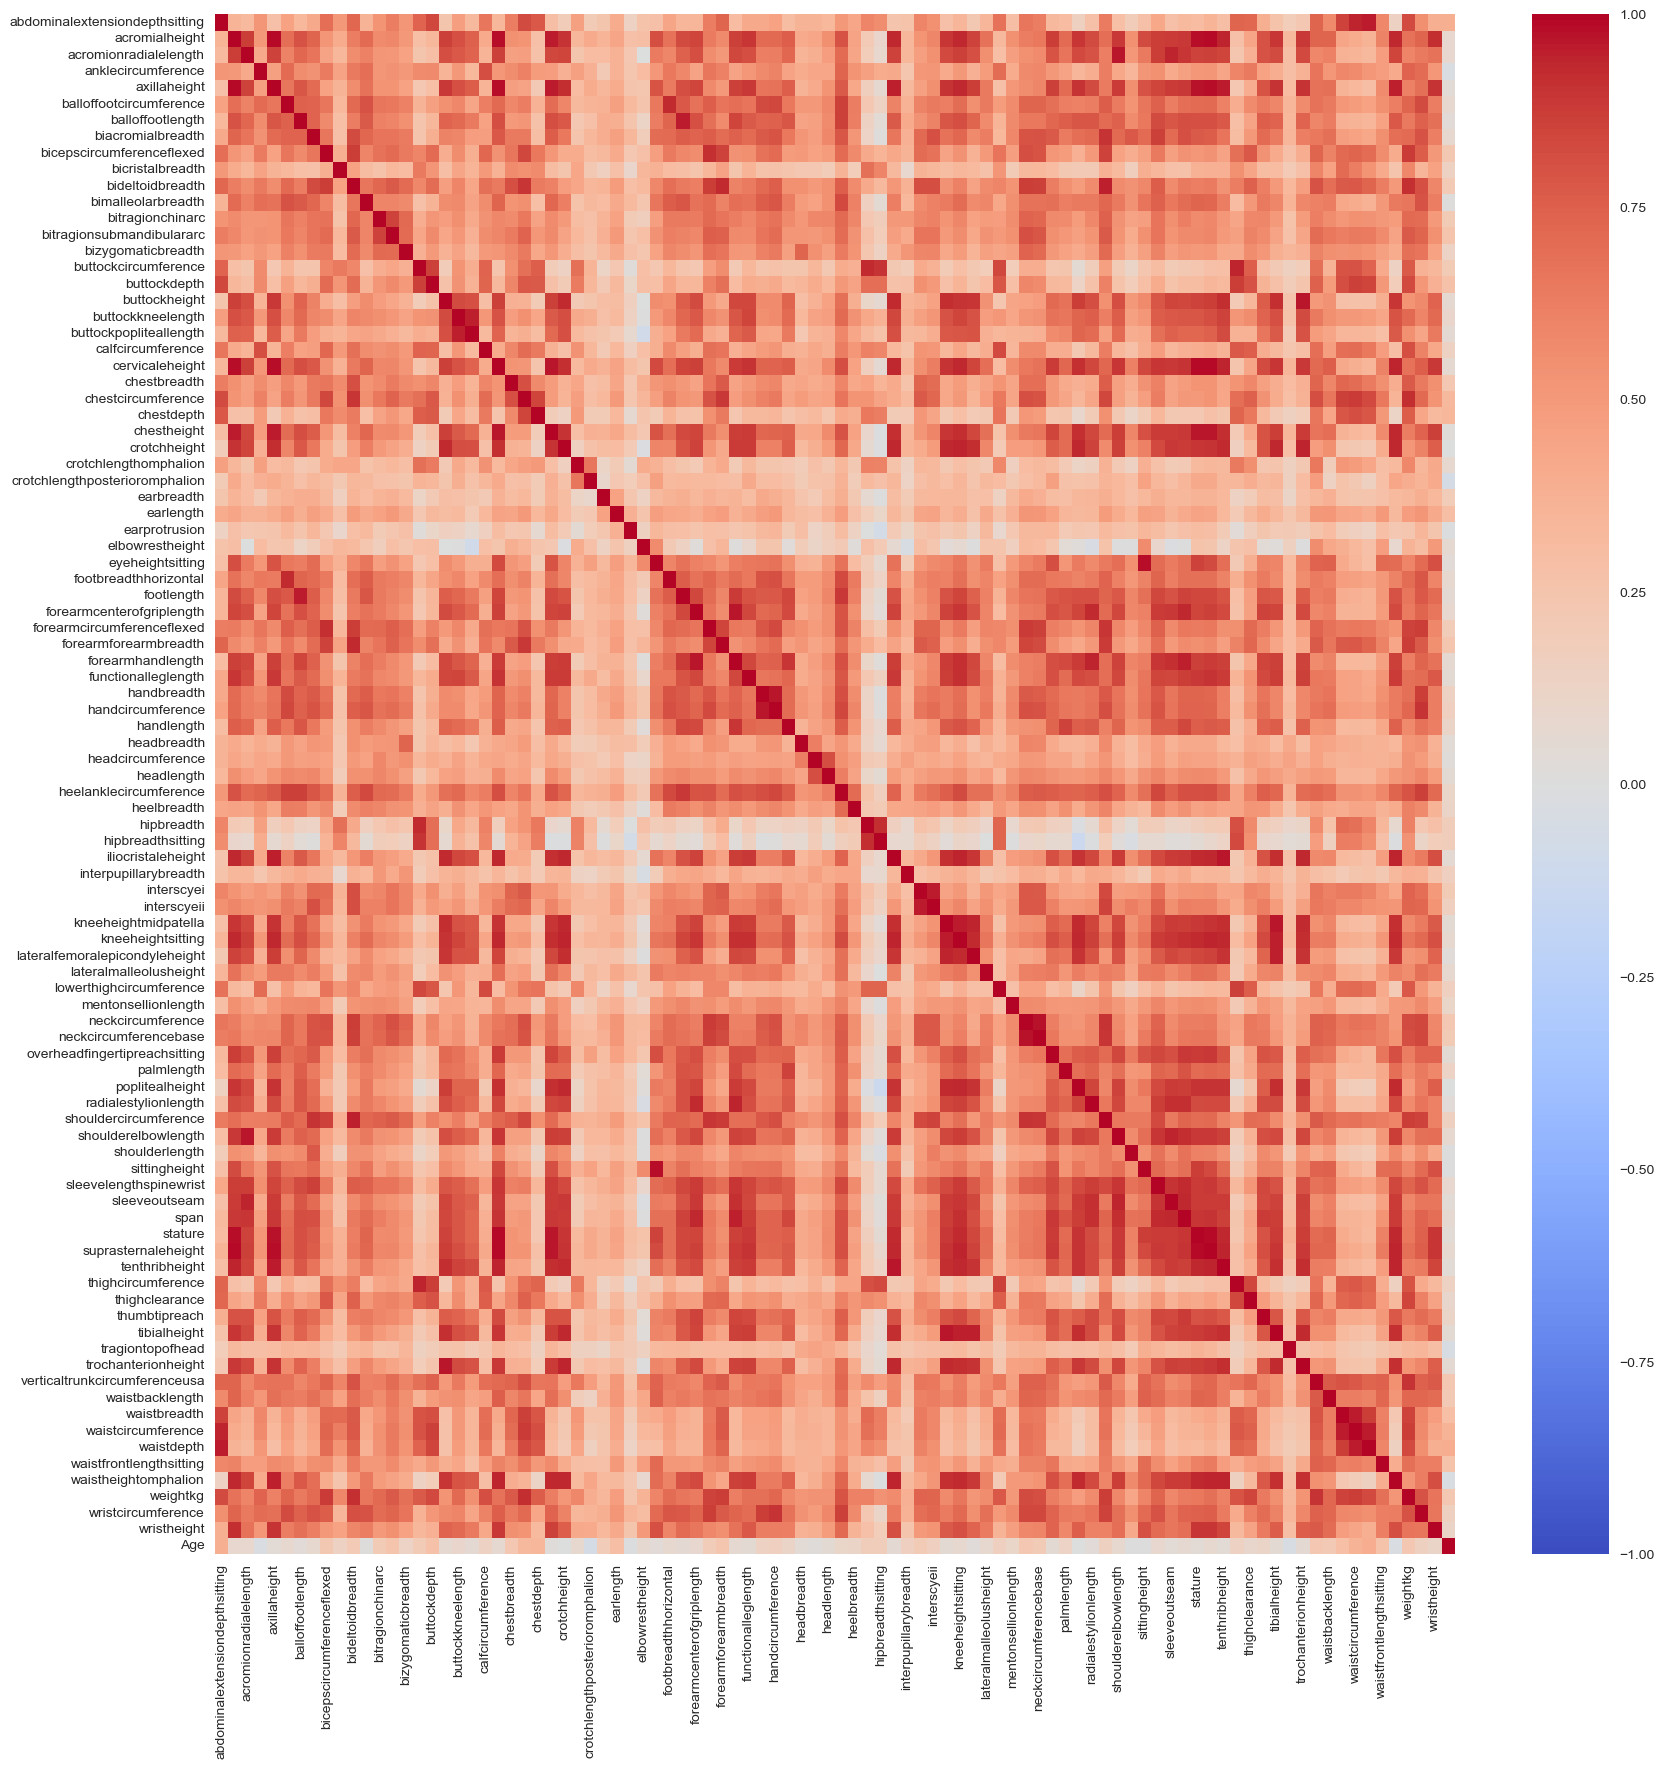

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.select_dtypes("number").corr(),vmin=-1, vmax=1, cmap ="coolwarm")

# Multicolinarity has been observed between independent variables. However, multicolinarity is not a problem for
# Logistic regression and non-parametric algoritms.

In [ ]:
X = df.drop(columns= ["DODRace"])
y = df.DODRace

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=10)

In [ ]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
                         remainder='passthrough',
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 1. Logistic model

### Vanilla Logistic Model

In [ ]:
from sklearn.pipeline import Pipeline
operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(class_weight='balanced',
                                         random_state=101))]

pipe_log_model = Pipeline(steps=operations)

In [ ]:
pipe_log_model.fit(X_train,y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(class_weight='balanced',
                                    random_state=101))])

In [ ]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[341  32  16]
 [ 30 130  44]
 [ 43 243 852]]
              precision    recall  f1-score   support

       Black       0.82      0.88      0.85       389
    Hispanic       0.32      0.64      0.43       204
       White       0.93      0.75      0.83      1138

    accuracy                           0.76      1731
   macro avg       0.69      0.75      0.70      1731
weighted avg       0.84      0.76      0.79      1731


Train_Set
[[ 798   77   34]
 [  35  334  106]
 [  96  554 2004]]
              precision    recall  f1-score   support

       Black       0.86      0.88      0.87       909
    Hispanic       0.35      0.70      0.46       475
       White       0.93      0.76      0.84      2654

    accuracy                           0.78      4038
   macro avg       0.71      0.78      0.72      4038
weighted avg       0.85      0.78      0.80      4038



In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


f1_Hispanic = make_scorer(f1_score, average = None, labels = ["Hispanic"])
precision_Hispanic = make_scorer(precision_score, average = None, labels =["Hispanic"])
recall_Hispanic = make_scorer(recall_score, average = None, labels =["Hispanic"])


scoring = {"f1_Hispanic":f1_Hispanic,
           "precision_Hispanic":precision_Hispanic,
           "recall_Hispanic":recall_Hispanic}

# In multiclass data, you can get CV scores on whatever your target label is.
# Again we have to use the make_scorer function.
# When the data is multi-class, average, and labels parameters must be specified in the make_scorer function.
# Label names should be given as a list.
# If we are defining a scorer for a single class, average: None should be set.

In [ ]:
from sklearn.model_selection import cross_validate

operations = [("OneHotEncoder", column_trans),("scaler", StandardScaler()), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

#no overfitting

test_f1_Hispanic            0.640946
train_f1_Hispanic           0.735419
test_precision_Hispanic     0.720163
train_precision_Hispanic    0.819761
test_recall_Hispanic        0.580984
train_recall_Hispanic       0.666893
dtype: float64

### Logistic Model GridsearchCV

In [ ]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [ ]:
param_grid = {
    "log__C": [0.1, 0.2],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
}

In [ ]:
operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(class_weight='balanced',
                                         random_state=101))]

model = Pipeline(steps=operations)


log_model_grid = GridSearchCV(model,
                              param_grid,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [ ]:
log_model_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.2], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs', 'newton-cg',
                                         'sag', 'saga']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [ ]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=0.2, class_weight='balanced',
                                    random_state=101, solver='newton-cg'))])

In [ ]:
pd.DataFrame(log_model_grid.cv_results_).loc[log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.757757
mean_train_score    0.859415
Name: 17, dtype: object

In [ ]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[355  21  13]
 [ 26 150  28]
 [ 28 132 978]]
              precision    recall  f1-score   support

       Black       0.87      0.91      0.89       389
    Hispanic       0.50      0.74      0.59       204
       White       0.96      0.86      0.91      1138

    accuracy                           0.86      1731
   macro avg       0.77      0.84      0.80      1731
weighted avg       0.88      0.86      0.87      1731


Train_Set
[[ 867   19   23]
 [  13  408   54]
 [  61  309 2284]]
              precision    recall  f1-score   support

       Black       0.92      0.95      0.94       909
    Hispanic       0.55      0.86      0.67       475
       White       0.97      0.86      0.91      2654

    accuracy                           0.88      4038
   macro avg       0.81      0.89      0.84      4038
weighted avg       0.91      0.88      0.89      4038



In [ ]:
operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(C=0.2,
                                         class_weight='balanced',
                                         random_state=101))]

model = Pipeline(steps=operations)


scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic            0.417859
train_f1_Hispanic           0.440517
test_precision_Hispanic     0.306435
train_precision_Hispanic    0.322417
test_recall_Hispanic        0.658910
train_recall_Hispanic       0.695203
dtype: float64

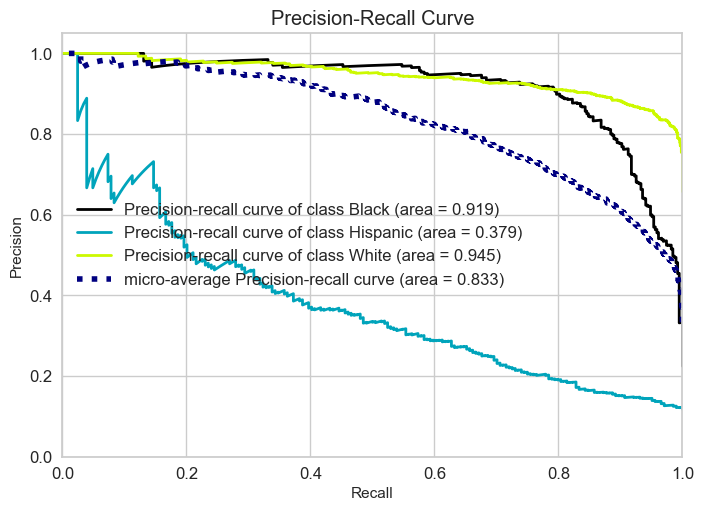

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(C=0.2,
                                         class_weight='balanced',
                                         random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
pd.get_dummies(y_test).values

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [ ]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

# 0 black, 1 hispanic, 2 white skorlarını döndürür.
# Burda 1 vererek hispanic skorları aldık.

0.37891387908819935

In [ ]:
y_pred = log_model_grid.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_precision = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])



## 2. SVC

### Vanilla SVC model

In [ ]:
from sklearn.svm import SVC

In [ ]:
operations_svc = [("OneHotEncoder", column_trans),
                  ("svc", SVC(class_weight="balanced",random_state=101))]

pipe_svc_model = Pipeline(steps=operations_svc)

In [ ]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  89  60]
 [ 26 123  55]
 [ 61 405 672]]
              precision    recall  f1-score   support

       Black       0.73      0.62      0.67       389
    Hispanic       0.20      0.60      0.30       204
       White       0.85      0.59      0.70      1138

    accuracy                           0.60      1731
   macro avg       0.60      0.60      0.56      1731
weighted avg       0.75      0.60      0.64      1731


Train_Set
[[ 572  202  135]
 [  36  296  143]
 [ 180  916 1558]]
              precision    recall  f1-score   support

       Black       0.73      0.63      0.67       909
    Hispanic       0.21      0.62      0.31       475
       White       0.85      0.59      0.69      2654

    accuracy                           0.60      4038
   macro avg       0.59      0.61      0.56      4038
weighted avg       0.75      0.60      0.64      4038



In [ ]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic            0.304477
train_f1_Hispanic           0.312567
test_precision_Hispanic     0.203456
train_precision_Hispanic    0.208700
test_recall_Hispanic        0.605940
train_recall_Hispanic       0.622449
dtype: float64

###  SVC Model GridsearchCV

In [ ]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [ ]:
param_grid = {
    'svc__C': [0.2, 0.3],
    'svc__gamma': ["scale", "auto", 0.01],
    'svc__kernel':['linear', 'rbf']
}

In [ ]:
operations_svc = [("OneHotEncoder", column_trans),
                  ("svc", SVC(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [ ]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.2, 0.3],
                         'svc__gamma': ['scale', 'auto', 0.01],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [ ]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc',
                 SVC(C=0.3, class_weight='balanced', kernel='linear',
                     random_state=101))])

In [ ]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score      0.71352
mean_train_score    0.812397
Name: 6, dtype: object

In [ ]:
operations_svc = [("OneHotEncoder", column_trans),
                  ("svc", SVC(C=0.2,
                              class_weight='balanced',
                              kernel='linear',
                              random_state=101))]

model = Pipeline(steps=operations_svc)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic            0.474243
train_f1_Hispanic           0.542448
test_precision_Hispanic     0.356328
train_precision_Hispanic    0.407004
test_recall_Hispanic        0.711525
train_recall_Hispanic       0.813328
dtype: float64

In [ ]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[346  34   9]
 [ 28 139  37]
 [ 39 225 874]]
              precision    recall  f1-score   support

       Black       0.84      0.89      0.86       389
    Hispanic       0.35      0.68      0.46       204
       White       0.95      0.77      0.85      1138

    accuracy                           0.79      1731
   macro avg       0.71      0.78      0.72      1731
weighted avg       0.85      0.79      0.81      1731


Train_Set
[[ 839   52   18]
 [  26  382   67]
 [  93  508 2053]]
              precision    recall  f1-score   support

       Black       0.88      0.92      0.90       909
    Hispanic       0.41      0.80      0.54       475
       White       0.96      0.77      0.86      2654

    accuracy                           0.81      4038
   macro avg       0.75      0.83      0.76      4038
weighted avg       0.88      0.81      0.83      4038



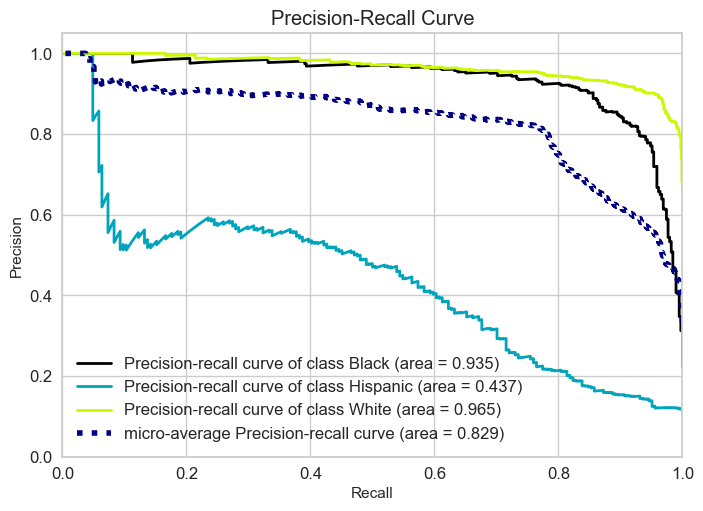

In [ ]:
operations = [("OneHotEncoder", column_trans),
              ("svc", SVC(C=0.2,
                          class_weight='balanced',
                          kernel='linear',
                          random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

In [ ]:
decision_function

array([[-0.31658702,  2.29822747,  1.30411866],
       [-0.32629629,  1.28878338,  2.32518061],
       [-0.31805111,  1.27743925,  2.3135488 ],
       ...,
       [ 2.31177616,  0.72053698, -0.30089231],
       [-0.32152009,  1.29535349,  2.31702571],
       [-0.32125345,  1.29925285,  2.3156154 ]])

In [ ]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.43692147316079544

In [ ]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_precision = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [ ]:
cat

Index(['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value',
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat),
                                       remainder='passthrough')

In [ ]:
operations_rf = [("OrdinalEncoder", column_trans),
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=101))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [ ]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[ 259    0  130]
 [  15    7  182]
 [  13    1 1124]]
              precision    recall  f1-score   support

       Black       0.90      0.67      0.77       389
    Hispanic       0.88      0.03      0.07       204
       White       0.78      0.99      0.87      1138

    accuracy                           0.80      1731
   macro avg       0.85      0.56      0.57      1731
weighted avg       0.82      0.80      0.75      1731


Train_Set
[[ 909    0    0]
 [   0  475    0]
 [   0    0 2654]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       909
    Hispanic       1.00      1.00      1.00       475
       White       1.00      1.00      1.00      2654

    accuracy                           1.00      4038
   macro avg       1.00      1.00      1.00      4038
weighted avg       1.00      1.00      1.00      4038



In [ ]:
operations_rf = [("OrdinalEncoder", column_trans),
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic            0.055087
train_f1_Hispanic           1.000000
test_precision_Hispanic     0.525000
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.029388
train_recall_Hispanic       1.000000
dtype: float64

### RF Model GridsearchCV

In [ ]:
param_grid = {'RF_model__n_estimators':[400,500],
             'RF_model__max_depth':[2,3]} #'min_samples_split':[18,20,22], 'max_features': ['sqrt', 'log2' None, 15, 20]


In [ ]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [ ]:
operations_rf = [("OrdinalEncoder", column_trans),
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             scoring=recall_Hispanic,
                             n_jobs=-1,
                             cv=10,
                             return_train_score=True)

In [ ]:
rf_grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [ ]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        n_estimators=500, random_state=101))])

In [ ]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3, 'RF_model__n_estimators': 500}

In [ ]:
pd.DataFrame(rf_grid_model.cv_results_).loc[rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.637722
mean_train_score    0.694037
Name: 3, dtype: object

In [ ]:
rf_grid_model.best_score_

0.6377216312056737

In [ ]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[294  62  33]
 [ 36 127  41]
 [ 89 459 590]]
              precision    recall  f1-score   support

       Black       0.70      0.76      0.73       389
    Hispanic       0.20      0.62      0.30       204
       White       0.89      0.52      0.65      1138

    accuracy                           0.58      1731
   macro avg       0.60      0.63      0.56      1731
weighted avg       0.76      0.58      0.63      1731


Train_Set
[[ 702  132   75]
 [  36  330  109]
 [ 250 1024 1380]]
              precision    recall  f1-score   support

       Black       0.71      0.77      0.74       909
    Hispanic       0.22      0.69      0.34       475
       White       0.88      0.52      0.65      2654

    accuracy                           0.60      4038
   macro avg       0.60      0.66      0.58      4038
weighted avg       0.77      0.60      0.64      4038



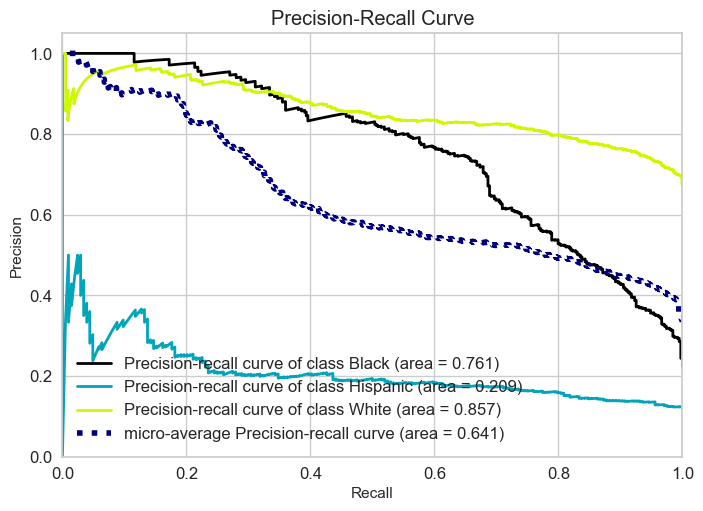

In [ ]:
operations_rf = [("OrdinalEncoder", column_trans),
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     max_depth=2,
                                                     n_estimators=400,
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_precision = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [ ]:
operations_xgb = [("OrdinalEncoder", column_trans),
                  ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

y_train_xgb = y_train.map({"Black":0, "Hispanic":1, "White":2}) # sıralama classification_report ile aynı olacak.
y_test_xgb = y_test.map({"Black":0, "Hispanic":1, "White":2})
# xgb 1.6 ve üzeri versiyonlarda target numeric olmaz ise hata döndürüyor. Bu sebeple manuel olarak dönüşümü yapıyoruz.


pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, c...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[ 332    8   49]
 [  20   70  114]
 [  11   18 1109]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       389
           1       0.73      0.34      0.47       204
           2       0.87      0.97      0.92      1138

    accuracy                           0.87      1731
   macro avg       0.84      0.72      0.76      1731
weighted avg       0.86      0.87      0.86      1731


Train_Set
[[ 909    0    0]
 [   0  475    0]
 [   0    0 2654]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       909
           1       1.00      1.00      1.00       475
           2       1.00      1.00      1.00      2654

    accuracy                           1.00      4038
   macro avg       1.00      1.00      1.00      4038
weighted avg       1.00      1.00      1.00      4038



In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train_xgb)
classes_weights

# XGboost algortimasının multiclass datalar için weight_class hyper parametresi olmadığından. fit fonksiyonu içinde
# sample_weight hyper paremetresini kullanabiliyoruz.

array([1.48074807, 0.50715901, 0.50715901, ..., 2.83368421, 0.50715901,
       0.50715901])

In [ ]:
my_dict = {"weights": classes_weights, "label":y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

,weights,label
4111,1.480748,0
3474,0.507159,2
3640,0.507159,2
2639,0.507159,2
3198,2.833684,1


In [ ]:
comp.groupby("label").value_counts()

# weight x class_sayısı bize aynı sonuçları verecektir.

label  weights 
0      1.480748     909
1      2.833684     475
2      0.507159    2654
dtype: int64

In [ ]:
pipe_model_xgb.fit(X_train,
                   y_train_xgb,
                   XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its
# instances, which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, c...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[ 342    4   43]
 [  27   81   96]
 [  17   36 1085]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       389
           1       0.67      0.40      0.50       204
           2       0.89      0.95      0.92      1138

    accuracy                           0.87      1731
   macro avg       0.81      0.74      0.77      1731
weighted avg       0.86      0.87      0.86      1731


Train_Set
[[ 909    0    0]
 [   0  475    0]
 [   0    0 2654]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       909
           1       1.00      1.00      1.00       475
           2       1.00      1.00      1.00      2654

    accuracy                           1.00      4038
   macro avg       1.00      1.00      1.00      4038
weighted avg       1.00      1.00      1.00      4038



In [ ]:
scoring_xgb = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =[1]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =[1]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =[1])}

# xgb categric target kabul etmediğinden hispaniclere karşılık gelen 1 numeric clasıına göre scoring_xgb'u düzenliyoruz.

In [ ]:
operations_xgb = [("OrdinalEncoder", column_trans),
                  ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model,
                        X_train,
                        y_train_xgb,
                        scoring=scoring_xgb,
                        cv=5,
                        return_train_score=True,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.699488
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.416842
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.521830
train_f1_Hispanic           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [ ]:
param_grid = {"XGB_model__n_estimators":[20, 40],
              'XGB_model__max_depth':[2,4,6],
              "XGB_model__learning_rate": [0.03, 0.05],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [ ]:
operations_xgb = [("OrdinalEncoder", column_trans),
                  ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model,
                              param_grid,
                              scoring=make_scorer(recall_score, average = None, labels =[1]),
                              cv=5,
                              n_jobs=-1,
                              return_train_score=True)

In [ ]:
xgb_grid_model.fit(X_train,
                   y_train_xgb,
                   XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(ba...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [2, 4, 6],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [ ]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, c...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=40,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 4,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 1}

In [ ]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.583158
mean_train_score    0.846316
Name: 19, dtype: object

In [ ]:
xgb_grid_model.best_score_

0.5831578947368421

In [ ]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[314  41  34]
 [ 36 118  50]
 [ 70 207 861]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       389
           1       0.32      0.58      0.41       204
           2       0.91      0.76      0.83      1138

    accuracy                           0.75      1731
   macro avg       0.66      0.71      0.67      1731
weighted avg       0.80      0.75      0.77      1731


Train_Set
[[ 807   53   49]
 [  17  390   68]
 [ 158  397 2099]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       909
           1       0.46      0.82      0.59       475
           2       0.95      0.79      0.86      2654

    accuracy                           0.82      4038
   macro avg       0.74      0.83      0.77      4038
weighted avg       0.86      0.82      0.83      4038



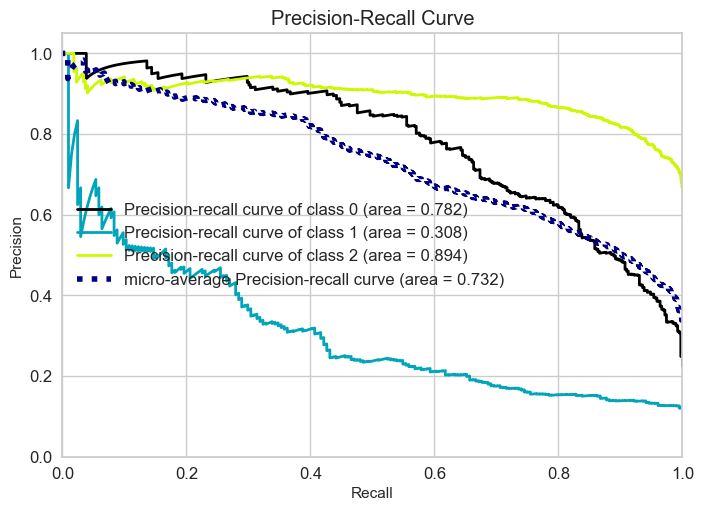

In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve


operations_xgb = [("OrdinalEncoder", column_trans),
                  ("XGB_model", XGBClassifier(colsample_bytree=0.8,
                                              learning_rate=0.05,
                                              max_depth=2,
                                              n_estimators=40,
                                              subsample=1,
                                              random_state=101))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train,
          y_train_xgb,
          XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()

In [ ]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [ ]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_precision = precision_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

## Comparing Models

In [ ]:
compare= pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                       "Precision": [log_precision[0], svc_precision[0], rf_precision[0], xgb_precision[0]],
                       "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                       "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

compare

,Model,Precision,Recall,AP
0,Logistic Regression,0.495050,0.735294,0.378914
1,SVM,0.349246,0.681373,0.436921
2,Random Forest,0.195988,0.622549,0.208711
3,XGBoost,0.322404,0.578431,0.308085


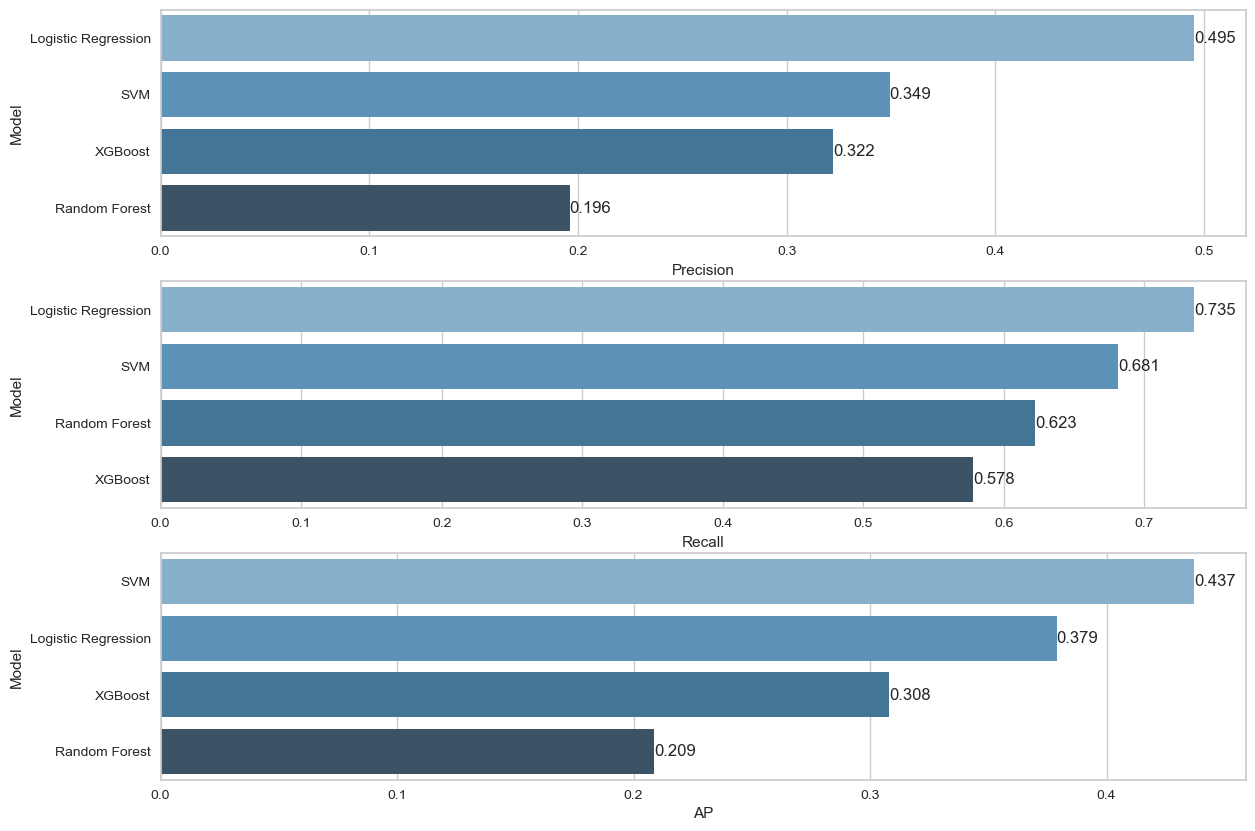

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
#pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline  as imbpipeline

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                      sparse=False), cat),
                                       remainder=MinMaxScaler())

In [ ]:
X_train_ohe = column_trans.fit_transform(X_train)


In [ ]:
over = SMOTE(sampling_strategy={"Hispanic": 800})
under = RandomUnderSampler(sampling_strategy={"White": 2200})

In [ ]:
y_train.value_counts()


White       2654
Black        909
Hispanic     475
Name: DODRace, dtype: int64

In [ ]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [ ]:
y_resampled_over.value_counts()


White       2654
Black        909
Hispanic     800
Name: DODRace, dtype: int64

In [ ]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [ ]:
steps = [('o', over), ('u', under)]


pipeline = imbpipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [ ]:
y_resampled.value_counts()


White       2200
Black        909
Hispanic     800
Name: DODRace, dtype: int64

In [ ]:
y_train.value_counts()

White       2654
Black        909
Hispanic     475
Name: DODRace, dtype: int64

## Logistic Regression Over/ Under Sampling

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                      sparse=False), cat),
                                       remainder=MinMaxScaler())

In [ ]:
operations = [("OneHotEncoder",column_trans),
              ('o', over),
              ('u', under),
              ("log", LogisticRegression(C=0.2,
                                         random_state=101))] #("scaler", MinMaxScaler())

# over veya under sampling dataya uygulandığında kesinlikle class_weight="balanced" kullanılmaz.

In [ ]:
smote_pipeline = imbpipeline(steps=operations)

In [ ]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 800})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2200})),
                ('log', LogisticRegression(C=0.2, random_state=101))])

In [ ]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[ 336   20   33]
 [  18  123   63]
 [   9   47 1082]]
              precision    recall  f1-score   support

       Black       0.93      0.86      0.89       389
    Hispanic       0.65      0.60      0.62       204
       White       0.92      0.95      0.93      1138

    accuracy                           0.89      1731
   macro avg       0.83      0.81      0.82      1731
weighted avg       0.89      0.89      0.89      1731


Train_Set
[[ 817   12   80]
 [  17  300  158]
 [  26  104 2524]]
              precision    recall  f1-score   support

       Black       0.95      0.90      0.92       909
    Hispanic       0.72      0.63      0.67       475
       White       0.91      0.95      0.93      2654

    accuracy                           0.90      4038
   macro avg       0.86      0.83      0.84      4038
weighted avg       0.90      0.90      0.90      4038



In [ ]:
model = imbpipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic            0.639984
train_f1_Hispanic           0.681694
test_precision_Hispanic     0.683309
train_precision_Hispanic    0.723091
test_recall_Hispanic        0.606427
train_recall_Hispanic       0.644911
dtype: float64

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [ ]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                            sparse=False), cat),
                                              remainder=MinMaxScaler())

operations_final = [("OneHotEncoder",column_trans_final),
                    ("log", LogisticRegression(C=0.2,
                                               class_weight='balanced',
                                               random_state=101))]

final_model = Pipeline(steps=operations_final)

In [ ]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(C=0.2, class_weight='balanced',
                                    random_state=101))])

In [ ]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7604271063036754

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7522602996624356

In [ ]:
X[X.Gender=="Male"].describe()

# Datamızdaki tüm erkek askerlerin ortalama değerleri üzerinden modele tahmnin yaptıracağız.

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
count,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.00000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000
mean,255.449090,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.004360,358.579636,275.632213,510.927674,74.844063,331.655809,315.718389,142.434983,1021.294178,246.362401,889.500385,619.217235,504.001026,392.426520,1519.422160,289.786868,1060.496794,254.390100,1293.040267,847.637599,623.143114,356.354706,36.095153,64.171070,23.109772,244.823544,804.885099,101.893819,271.573993,349.573480,310.528084,580.702231,480.928956,1132.125673,88.379841,212.571172,193.509361,154.183637,574.708130,199.760708,344.002052,72.564504,346.256732,379.948448,1063.412670,639.948705,431.393947,450.628623,489.366504,555.224929,492.625545,73.061554,409.670685,122.684534,398.192101,435.159528,1428.469351,116.610156,430.684791,268.313927,1179.902539,364.305976,149.832265,918.678636,897.179277,594.007951,1816.628879,1758.385483,1440.699667,1122.444473,626.335214,180.739420,813.085407,469.222878,131.116697,902.586817,1666.783278,478.017953,327.110798,943.043344,238.560400,388.017440,1058.239805,858.714286,176.168761,848.762247,30.172352
std,37.295117,62.356906,17.281413,14.579399,58.714251,12.89351,10.329358,19.074837,34.511924,17.512428,32.450260,4.097052,13.970798,16.640502,6.141613,76.330564,26.4

In [ ]:
female_mean_human = X[X.Gender=="Female"].describe(include="all").loc["mean"]
female_mean_human

# mean değerlerini loc["mean"] ile çekiyoruz. include="all" diyerek kategorik verilerinde döndürülmesini istiyoruz.
# Kategorik veriler Nan döneceğinden bu kategorik gözlemlere aşağıdaki atamaları yapıyoruz.

abdominalextensiondepthsitting     230.167914
acromialheight                    1337.080214
acromionradialelength              311.917112
anklecircumference                 216.050267
axillaheight                      1241.028342
balloffootcircumference             228.23262
balloffootlength                   182.378075
biacromialbreadth                  365.723529
bicepscircumferenceflexed          306.391444
bicristalbreadth                   273.383957
bideltoidbreadth                   450.853476
bimalleolarbreadth                  67.104813
bitragionchinarc                   311.005882
bitragionsubmandibulararc          287.827807
bizygomaticbreadth                 133.471123
buttockcircumference               1023.65508
buttockdepth                       233.627273
buttockheight                      835.859358
buttockkneelength                  592.170053
buttockpopliteallength              486.51123
calfcircumference                  373.577005
cervicaleheight                   

In [ ]:
female_mean_human["Gender"] = "Female"
female_mean_human["SubjectsBirthLocation"] = "California"
female_mean_human["WritingPreference"] = "Right hand"
female_mean_human["Installation"] = "Camp Shelby"
female_mean_human["Component"] = "Fort McCoy"


In [ ]:
pd.DataFrame(female_mean_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Installation,Component,Branch,SubjectsBirthLocation,Age,WritingPreference
mean,230.167914,1337.080214,311.917112,216.050267,1241.028342,228.23262,182.378075,365.723529,306.391444,273.383957,450.853476,67.104813,311.005882,287.827807,133.471123,1023.65508,233.627273,835.859358,592.170053,486.51123,373.577005,1397.65615,269.566845,948.540642,248.011765,1173.495187,784.296257,621.756684,342.550802,33.257754,59.343316,20.387166,231.649733,747.855615,92.704278,246.703743,318.369519,264.664706,495.543316,440.730481,1046.428342,78.255615,186.794118,181.371123,147.581818,561.492513,190.135829,310.908556,67.226203,354.506417,399.906952,997.824064,617.077005,373.950802,396.297326,450.182888,512.502674,466.992513,62.881818,401.25615,113.173797,330.12246,371.592513,1311.41016,108.886631,389.16738,241.917647,1029.698396,334.995722,135.548663,856.712299,808.274332,544.663102,1663.371658,1630.521925,1331.775936,1058.235829,617.846524,168.266845,745.08877,438.885561,126.377005,847.280214,1560.928877,425.487166,300.268449,862.134759,213.567914,355.114439,982.197861,680.605882,155.004278,794.997326,Female,Camp Shelby,Fort McCoy,NaN,California,28.950802,Right hand


In [ ]:
final_model.predict(pd.DataFrame(female_mean_human).T)


array(['Hispanic'], dtype=object)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___